<a href="https://colab.research.google.com/github/kangkana89/kangs-/blob/main/whatsApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
%matplotlib inline

**Detecting if a line starts with date and time format**

In [7]:
def date_time(s):
  #pattern='^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-2][0-9]):([0-5][0-9]) -'
  pattern='^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-1][0-9]):([0-5][0-9]) (am|pm) -'
  result=re.match(pattern,s)
  if(result):
    return True
  return False


**Detecting author of a particular message**

In [8]:
def authors(s):
  pattern= '^((([\w]+):)|(([\w]+[\s]+[\w]+):)|(([\w]+[\s]+[\w]+[\s]+[\w]+):)|(([+]\d{2} \d{5} \d{5}):))|(~+[\w])'
  #
  result=re.match(pattern,s)
  if(result):
    return True
  return False

**Extracting tokens**

In [9]:
def extract_tokens(s):
    ans=s.split(' - ')
    date_time=ans[0]
    date,time=date_time.split(', ')
    text=' '.join(ans[1:])
    if authors(text):
     author_msg=text.split(': ')
     author= author_msg[0]
     message=' '.join(author_msg[1:])
    else: 
     author=None 
     message=' '
    return date,time,author,message

**Parsing the entire file**

In [10]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = '/content/WhatsApp Chat with Buttercups😘.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file (usually contains information about end-to-end encryption)
        
    messageBuffer = [] # Buffer to capture intermediate output for multi-line messages
    date, time, author = None, None, None # Intermediate variables to keep track o the current message being processed
    
    while True:
        line = fp.readline() 
        if not line: # Stop reading further if end of file has been reached
            break
        line = line.strip() # Guarding against erroneous leading and trailing whitespaces
        if date_time(line): # If a line starts with a Date Time pattern, then this indicates the beginning of a new message
            if len(messageBuffer) > 0: # Check if the message buffer contains characters from previous iterations
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # Save the tokens from the previous message in parsedData
            messageBuffer.clear() # Clear the message buffer so that it can be used for the next message
            date, time,author,message= extract_tokens(line) # Identify and extract tokens from the line
            messageBuffer.append(message) # Append message to buffer
        else:
            messageBuffer.append(line) # If a line doesn't start with a Date Time pattern, then it is part of a multi-line message. So, just append to buffer


**Creating dataframe**

In [11]:
data=pd.DataFrame(parsedData,columns=['Date','Time','Author','Message'])
data.head(20)

,Date,Time,Author,Message
0,09/08/21,11:03 pm,neha,Bohut bisari uliaisu🥲
1,09/08/21,11:09 pm,Manalisa,🥰
2,09/08/21,11:09 pm,Manalisa,Saisu moi bisari bisari 🤭
3,09/08/21,11:10 pm,neha,Eibar j david e accept korise tar jen or uporo...
4,09/08/21,11:10 pm,neha,Brad harami tu e sob gorbor korise🥲
5,09/08/21,11:13 pm,Manalisa,Eikhini buji nai puwa🤔
6,09/08/21,11:14 pm,neha,"E characters gitae aasol life ot crush asil, r..."
7,09/08/21,11:14 pm,neha,1st season ot
8,09/08/21,11:44 pm,Manalisa,Oo
9,10/08/21,12:03 am,Manalisa,IMG-20210810-WA0000.jpg (file attached) Kangs ...


In [12]:
data.describe()

,Date,Time,Author,Message
count,230,230,230,230
unique,18,106,4,225
top,31/08/21,11:12 am,neha,Ooh
freq,54,8,78,2


**Message counts**

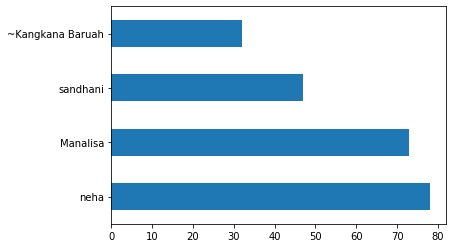

In [13]:
author_media_messages_value_counts = data['Author'].value_counts()
author_media_messages_value_counts.plot.barh()

**Emoji counts**

In [14]:
pip install emoji

     |████████████████████████████████| 184 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=27700c7c758bd988de92d744f5411ae64490a3f357c760e76097c9a6190b6163
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


In [15]:
import emoji
from collections import Counter

In [16]:
def split_count(text):
    emoji_list = []
    datas = re.findall(r'[^\w\s,]', text)
    for word in datas:
        if any(char in emoji.UNICODE_EMOJI["en"] for char in word):
            emoji_list.append(word)
    return emoji_list

In [17]:
data['emoji'] =data['Message'].apply(split_count)
emojis = sum(data['emoji'].str.len())
print(emojis) #Total emoji count

322


In [18]:
#Count of each emoji
total_emojis_list = list([a for b in data.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('😂', 143)
('🤣', 24)
('\U0001f972', 20)
('❤', 14)
('🥺', 14)
('🌚', 13)
('🥳', 13)
('😅', 13)
('😍', 8)
('🙂', 8)
('🥰', 7)
('🤭', 6)
('🤔', 5)
('😎', 5)
('😭', 5)
('🙄', 3)
('🙈', 3)
('😕', 3)
('☺', 3)
('🔥', 2)
('😆', 2)
('😯', 1)
('😶', 1)
('😑', 1)
('😪', 1)
('✨', 1)
('😘', 1)
('😉', 1)
('😌', 1)


**Word cloud of chats**

In [19]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator

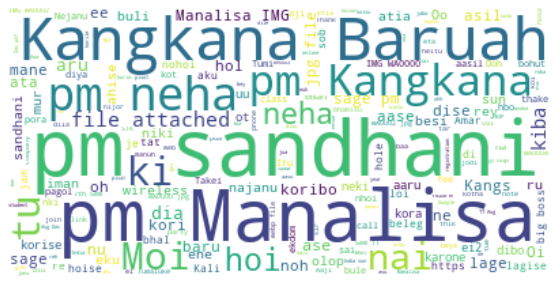

In [20]:
text = " ".join(review for review in data.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  ### Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**Total message sent on each day of the week**

In [21]:
#Your problem here is that to_datetime silently failed so the dtype remained as str/object, if you 
#set param errors='coerce' then if the conversion fails for any particular string then those rows are set to NaT.
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [22]:
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
data['Day'] = data['Date'].dt.weekday.map(weeks)
data = data[['Date','Day','Time','Author','Message']]
data['Day'] = data['Day'].astype('category')

In [23]:
val= data.Day.unique()
for i in range(len(val)):
  ### Filtering out messages of particular user
  req_data = data[data["Day"] == val[i]]
  ### req_df will contain messages of only one particular user
  print(val[i],'  ->  ',req_data.shape[0])

Wednesday   ->   19
Friday   ->   40
Monday   ->   23
Tuesday   ->   123
Thrusday   ->   1
Saturday   ->   11
Sunday   ->   13


**Analysis of time when group was highly active**

In [24]:
from matplotlib.ticker import MaxNLocator

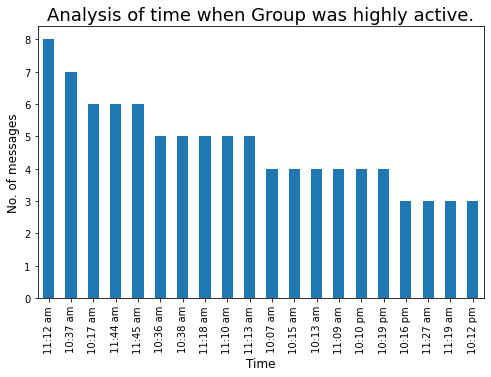

In [25]:
plt.figure(figsize=(8,5))
t = data['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

# New Section